In [ ]:
import pandas as pd # -> Module yang digunaakn untuk analisis data, editing dataframe
import numpy as np # -> Module yang digunakan untuk operasi matematika
import matplotlib.pyplot as plt # -> Module yang digunakan untuk melakukan visualisasi data
import seaborn as sns # -> Module yang digunakan untuk melakukan visualisasi data
import os # -> Untuk melakukan operasi sistem di google colab

# Anime Datasets

In [ ]:
anime_data = pd.read_csv("/content/anime.csv")
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime_data.sample(10)

,anime_id,name,genre,type,episodes,rating,members
6582,3264,Lemon Angel (1988/II),Ecchi,TV,8,6.05,462
3591,23945,Majimoji Rurumo,"Comedy, Ecchi, Fantasy, Magic, School, Shounen",TV,12,6.94,38952
6475,8668,Seikon no Qwaser Picture Drama,Ecchi,Special,16,6.10,8932
6066,4713,Heart no Kuni no Alice: Wonderful Wonder World,"Fantasy, Harem, Romance, Shoujo",Movie,1,6.26,20532
10555,12529,Time-Patrol Bon: Fujiko F. Fujio Anime Special...,"Action, Adventure",Special,1,5.46,83
10695,31269,Venus,Dementia,Movie,1,3.49,97
11162,30243,Gakuen de Jikan yo Tomare,Hentai,OVA,4,7.25,5163
6181,31133,Shounen Sunday CM Gekijou: InuYasha-hen,"Action, Demons, Fantasy",Special,2,6.23,1218
4224,3761,Wanwan Sanjuushi,"Adventure, Historical",TV,26,6.78,1277
8725,30046,Hadashi Neko,"Adventure, Comedy",Special,1,4.79,96


In [ ]:
print(anime_data.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


In [ ]:
anime_data["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [ ]:
anime_data["episodes"].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
anime_data["type"] = anime_data['type'].fillna("Not known")
anime_data['genre'] = anime_data['genre'].fillna("No Genre")
anime_data['rating'] = anime_data['rating'].fillna(0)
anime_data['episodes'] = anime_data['episodes'].fillna(0)

In [ ]:
anime_data.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
anime_data.duplicated().sum()

0

In [ ]:
anime_data = anime_data.assign(genre=anime_data['genre'].str.split(',')).explode('genre')
anime_data['genre'] = anime_data['genre'].str.strip()

In [ ]:
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,School,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# Berapa jumlah anime yang ada dalam dataset?

In [ ]:
jumlah_anime = len(anime_data)
print("Jumlah anime dalam dataset :", jumlah_anime)

Jumlah anime dalam dataset : 36347


# Apa judul anime dengan rating tertinggi?

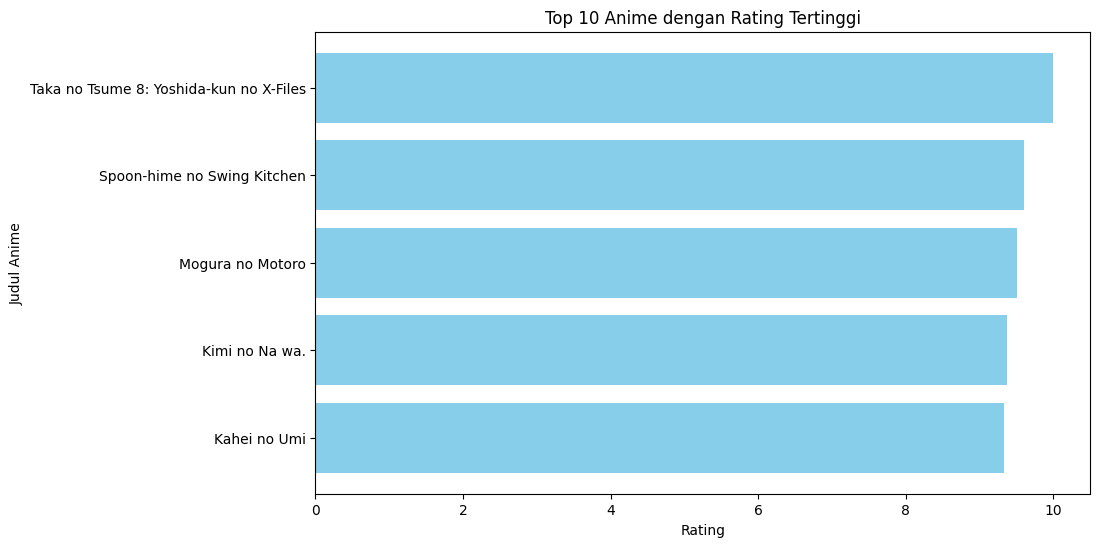

In [ ]:
# Mengurutkan dataset berdasarkan rating dari tertinggi ke terendah
anime_data_sorted = anime_data.sort_values(by='rating', ascending=False)

# Mengambil 10 data pertama (10 anime dengan rating tertinggi)
top_10_anime = anime_data_sorted.head(10)

# Membuat grafik bar
plt.figure(figsize=(10, 6))
plt.barh(top_10_anime['name'], top_10_anime['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Judul Anime')
plt.title('Top 10 Anime dengan Rating Tertinggi')
plt.gca().invert_yaxis()  # Membalik urutan agar rating tertinggi berada di atas
plt.show()

In [ ]:
# Menghitung jumlah anime dengan genre "Action"
jumlah_anime_action = anime_data[anime_data['genre'].str.contains('Action', na=False, case=False)].shape[0]

print("Jumlah anime dengan genre 'Action':", jumlah_anime_action)

Jumlah anime dengan genre 'Action': 2845


# Rating Dataset

In [ ]:
import pandas as pd

# Gunakan on_bad_lines='skip' untuk mengabaikan baris yang bermasalah
rating = pd.read_csv('/content/rating.csv', on_bad_lines='skip')
rating

,user_id,anime_id,rating
0,1.0,20.0,-1.0
1,1.0,24.0,-1.0
2,1.0,79.0,-1.0
3,1.0,226.0,-1.0
4,1.0,241.0,-1.0
...,...,...,...
5662539,28340.0,7568.0,7.0
5662540,28340.0,7590.0,10.0
5662541,28340.0,7592.0,9.0
5662542,28340.0,7593.0,9.0


In [ ]:
rating.isna().sum()

user_id      1
anime_id    14
rating      30
dtype: int64

In [ ]:

rating.duplicated().sum()

2603181

In [ ]:
rating = rating.drop_duplicates()

In [ ]:
rating.duplicated().sum()

0

In [ ]:
rating

,user_id,anime_id,rating
0,1.0,20.0,-1.0
1,1.0,24.0,-1.0
2,1.0,79.0,-1.0
3,1.0,226.0,-1.0
4,1.0,241.0,-1.0
...,...,...,...
5662539,28340.0,7568.0,7.0
5662540,28340.0,7590.0,10.0
5662541,28340.0,7592.0,9.0
5662542,28340.0,7593.0,9.0


# Machine Learning

In [ ]:
rating.groupby("anime_id").agg({"user_id": pd.Series.nunique,
                                "rating": ["mean", "median", "count"]})

user_id     rating             
          nunique       mean median count
anime_id                                 
-1.0            1        NaN    NaN     0
 1.0         5937   7.561563    9.0  5937
 2.0            1  10.000000   10.0     1
 5.0         2575   6.912233    8.0  2575
 6.0         4199   6.940938    8.0  4199
...           ...        ...    ...   ...
 34324.0        8   2.500000    2.0     8
 34325.0        4   7.750000    8.5     4
 34349.0        2   3.000000    3.0     2
 34475.0        1   6.000000    6.0     1
 104583.0       1   9.000000    9.0     1

[9615 rows x 4 columns]

In [ ]:
result = rating.groupby("anime_id").agg({"user_id": pd.Series.nunique,
                                         "rating": ["mean", "median", "count"]})

# Sort by count of ratings in descending order
result_sorted = result.sort_values(("rating", "count"), ascending=False)

print(result_sorted)


         user_id    rating              
         nunique      mean median  count
anime_id                                
 1535.0    15315  7.542344    9.0  15315
 11757.0   12291  6.870881    8.0  12291
 16498.0   11719  7.326990    9.0  11719
 6547.0    11093  7.261967    8.0  11093
 1575.0    10846  7.663286    9.0  10846
...          ...       ...    ...    ...
 24051.0       1  6.000000    6.0      1
 24049.0       1  3.000000    3.0      1
 10.0          3       NaN    NaN      0
 9.0           1       NaN    NaN      0
-1.0           1       NaN    NaN      0

[9615 rows x 4 columns]


In [ ]:
print(anime_data.index)

Index([    0,     0,     0,     0,     1,     1,     1,     1,     1,     1,
       ...
       12285, 12285, 12286, 12287, 12288, 12289, 12290, 12291, 12292, 12293],
      dtype='int64', length=36347)


In [ ]:
anime_data.iloc[1535]


anime_id                 25649
name        Junjou Romantica 3
genre               Shounen Ai
type                        TV
episodes                    12
rating                    8.16
members                  39866
Name: 348, dtype: object

In [ ]:
anime_rating = rating.groupby("anime_id", as_index = False)["rating"].median()

<Axes: xlabel='rating', ylabel='Count'>

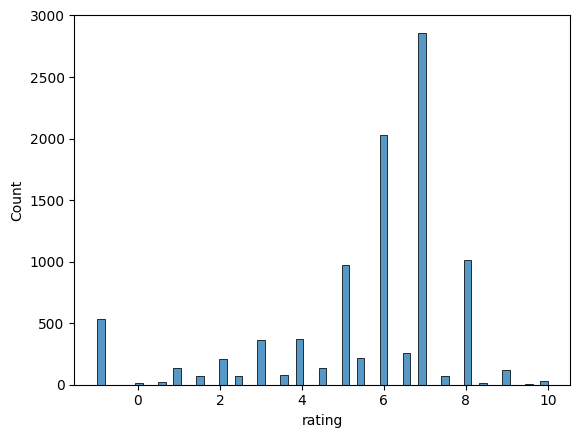

In [ ]:
sns.histplot(data=anime_rating,
            x="rating")

In [ ]:
anime_rating["good_anime"] = anime_rating["rating"] > 6

<Axes: ylabel='proportion'>

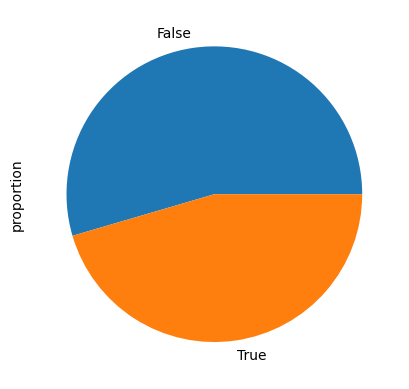

In [ ]:

anime_rating["good_anime"].value_counts(normalize=True).plot(kind = "pie")

In [ ]:
print(anime_rating.columns)

Index(['anime_id', 'rating', 'good_anime'], dtype='object')


In [ ]:
anime_rating.select_dtypes(include = "number")

,anime_id,rating
0,-1.0,NaN
1,1.0,9.0
2,2.0,10.0
3,5.0,8.0
4,6.0,8.0
...,...,...
9610,34324.0,2.0
9611,34325.0,8.5
9612,34349.0,3.0
9613,34475.0,6.0


In [ ]:
def select_columns(anime_rating: pd.DataFrame, features: list, target: list = "rating"):
  X = anime_rating[features]
  y = (anime_rating[target] >= 3).astype("int")

  return X, y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = ["anime_id", "rating"]
X, y = select_columns(anime_rating, features = features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()

In [ ]:
minmax.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [ ]:
def scaling(df, scaler):

  #df["runtime"] = df["runtime"].div(60)
  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns= scaler.get_feature_names_out())

  return scaled_df

In [ ]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [ ]:
X_test_scaled.iloc[0]

anime_id    0.965762
rating      0.545455
Name: 0, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()

In [ ]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [ ]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [ ]:
pd.crosstab(y_test, y_test_pred_knn)

In [ ]:
pd.crosstab(y_test, y_test_pred_dt)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt)

# Pisahkan nilai-nilai confusion matrix
tn, fp, fn, tp = cm.ravel()

# Buat pie chart
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [tn, fp, fn, tp]
colors = ['lightblue', 'lightcoral', 'orange', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Confusion Matrix (Pie Chart)')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_test_pred_dt)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt)

# Pisahkan nilai-nilai confusion matrix
tn, fp, fn, tp = cm.ravel()

# Buat pie chart
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [tn, fp, fn, tp]
colors = ['lightblue', 'lightcoral', 'orange', 'lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Confusion Matrix (Pie Chart)')
plt.show()


In [ ]:
print(classification_report(y_test, y_test_pred_dt))

In [ ]:
print(classification_report(y_test, y_test_pred_knn))

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [ ]:
print("recall    : ",recall_score(y_test, y_test_pred_knn))
print("precision :",precision_score(y_test, y_test_pred_knn))
print("accuracy  :", accuracy_score(y_test, y_test_pred_knn))
print("f1 score  :",f1_score(y_test, y_test_pred_knn))

In [ ]:
knn.get_params()

In [ ]:
knn_params = KNeighborsClassifier(p =2, n_neighbors=5)

In [ ]:
knn_params.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, knn_params.predict(X_test)))

In [ ]:
print(confusion_matrix(y_test, knn_params.predict(X_test)))

In [ ]:
knn_params = {
    "n_neighbors" : [3, 5, 7, 9],
    "p" : [1,2,3,4,5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_new = GridSearchCV(KNeighborsClassifier(),
                       knn_params,
                       scoring = f1_score)

In [ ]:
knn_new.fit(X_train, y_train)

In [ ]:
knn_new.best_params_

In [ ]:
knn_best = knn_new.best_estimator_

In [ ]:
knn_new.best_score_

In [ ]:
prob = knn_best.predict_proba(X_test)[:, 1]

In [ ]:
(prob >= 0.7).astype("int")

In [ ]:
knn_best.predict(X_test)

In [ ]:
recall_ = []
precision_ = []
f1_score_ = []
accuracy_ = []

for i in range(1, 11):
  y_best_knn_proba = knn_best.predict_proba(X_test)[:, 1]
  recall_.append(recall_score(y_test, y_best_knn_proba >= i/10))
  precision_.append(precision_score(y_test, y_best_knn_proba >= i/10))
  f1_score_.append(f1_score(y_test, y_best_knn_proba >= i/10))
  accuracy_.append(accuracy_score(y_test, y_best_knn_proba >= i/10))

In [ ]:
metrics = pd.DataFrame({
    "Recall": recall_,
    "Precision": precision_,
    "F1_score": f1_score_,
    "Accuracy": accuracy_
})

In [ ]:
metrics["fpr"] = 1 - metrics['Recall']

In [ ]:
metrics.plot(x = "fpr" ,y = "Recall")

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, knn_best.predict(X_test))

In [ ]:
anime_data = pd.DataFrame(anime_data)

# Simpan DataFrame ke CSV
anime_data.to_excel('anime_data.xlsx', index=False)

In [ ]:
anime_rating = pd.DataFrame(rating)

# Simpan DataFrame ke CSV
anime_data.to_excel('anime_.xlsx', index=False)